In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm,tree
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [3]:
X= pd.read_csv('dengue_features_train.csv')
Y= pd.read_csv('dengue_labels_train.csv')

In [4]:
X

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [5]:
Y

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


Assume that the both data are sorted (i would not join using  x.city=y.city and x.year=y.year and x.weekofyear=y.weekofyear )

In [6]:
X['total_cases']=Y['total_cases'].astype(int)

In [7]:
X

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


#### Step 1- Checking for the null in the dataset<br>
#### Step 2- Fill Null values if found<br>
#### Step 3- Understand the distribution of the data<br>
#### Step 4- Convert Categorical columns to numbers
#### Step 5- Apply Feature selection OR Feature Reduction
#### Step 6- Apply ML
#### Step 7- Apply model for test set

# Step 1: Check Nulls

In [8]:
X.isnull().any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

# Step 2: Fill Null

In [9]:
# if i droped the nulls, the total count of the dataset will be = 1199
# for now, i will drop the nulls, but after while, i will fill the nulls for each column using liner reggrsssion or KNN, or to be easy
# I might fill with the mean (I should checking for outliers first)

print(X.isna().sum())
X.dropna(inplace=True)

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

Fill the missing data with the mean

In [10]:
# Columns with missing data
# cols_with_missing = [col for col in X.columns
#                      if X[col].isnull().any()]
# X[cols_with_missing].fillna(X[cols_with_missing].mean(), inplace=True)

# Step 3: Understand the distribution of the data

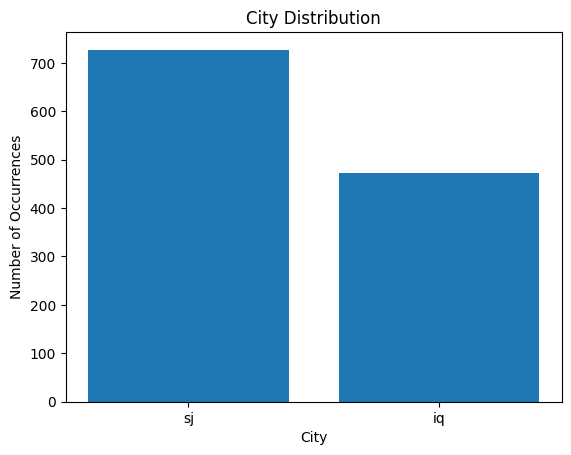

In [11]:
city_counts = X['city'].value_counts()

plt.bar(city_counts.index, city_counts.values)
plt.xlabel('City')
plt.ylabel('Number of Occurrences')
plt.title('City Distribution')
plt.show()

In [12]:
def getMonth(row):
    date=row['week_start_date']
    month = int(date.split('-')[1] )
    return month

months = X.apply(getMonth,axis=1)
test_cases = X['total_cases']

In [13]:
time_month = np.zeros(13)
for i in range(len(months)):
    time_month[months.iloc[i]]+=test_cases.iloc[i]

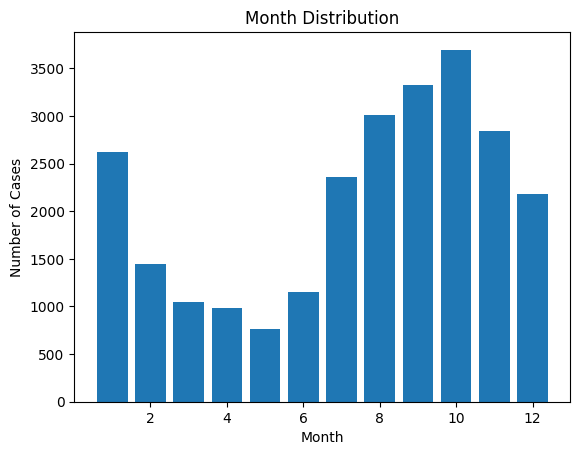

In [14]:
plt.bar(range(1,13),time_month[1:])
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Month Distribution')
plt.show()

I observe that the disease increases in the summer

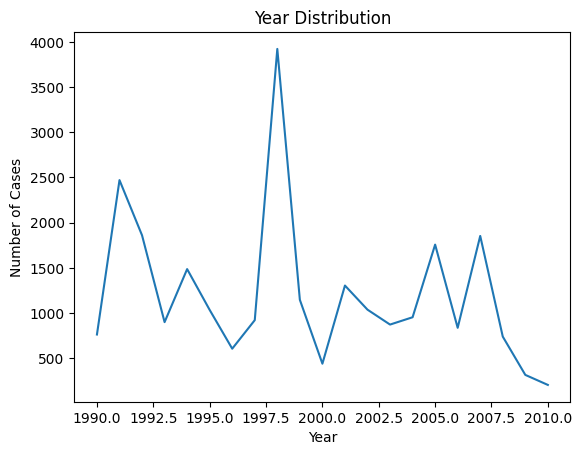

In [15]:
time_year = np.zeros(21)
for i in range(len(X)):
    time_year[X['year'].iloc[i]-1990]+=test_cases.iloc[i].astype(int)

plt.plot(range(1990,2011),time_year)
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Year Distribution')
plt.show()


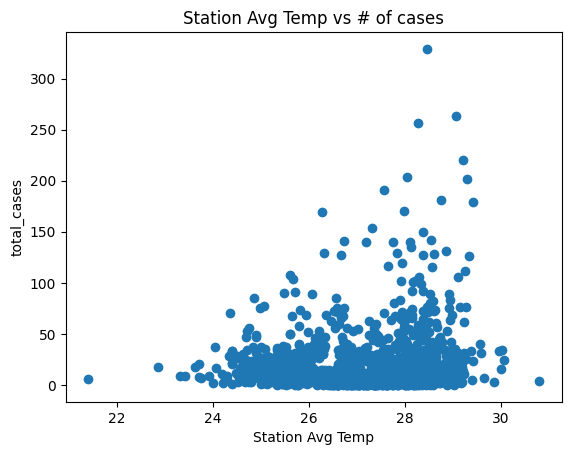

In [16]:
# plot station_avg_temp_c against total_cases
plt.scatter(X['station_avg_temp_c'], X['total_cases'])
plt.xlabel('Station Avg Temp')
plt.ylabel('total_cases')
plt.title('Station Avg Temp vs # of cases')
plt.show()


No direct relation between station average temperature and the number of cases

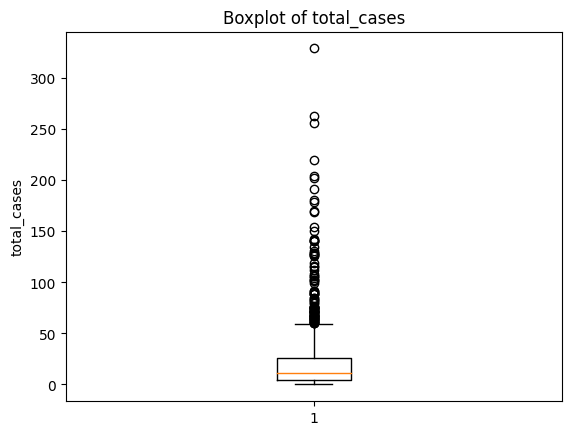

In [17]:
plt.boxplot(X['total_cases'])
plt.ylabel('total_cases')
plt.title('Boxplot of total_cases')
plt.show()

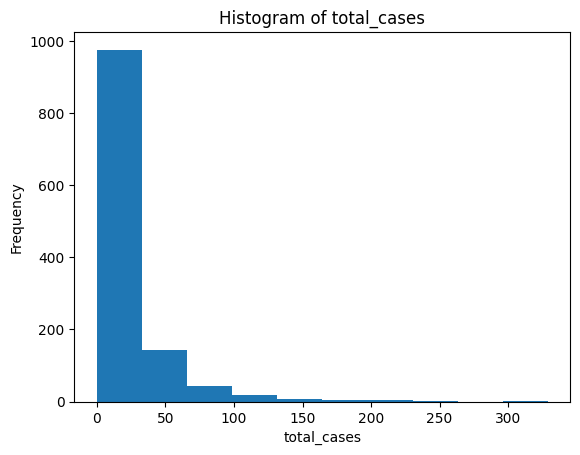

In [18]:
# draw histogram of total_cases
plt.hist(X['total_cases'])
plt.xlabel('total_cases')
plt.ylabel('Frequency')
plt.title('Histogram of total_cases')
plt.show()

As we can see from the Box Plot diagram and the histogram of the Total Cases, number above ~75 are outliers, So, i am going to remove them

In [19]:
# remove outliers
X = X[X['total_cases'] < 75]
X.shape

(1139, 25)

# Step 4: Convert categorical data and Normalize the data

In [20]:
# convert city to 0 and 1
X['city']=X['city'].map({'sj':0,'iq':1})

C:\Users\aymanmorshdy\AppData\Local\Temp\ipykernel_12384\254687897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['city']=X['city'].map({'sj':0,'iq':1})


In [21]:
# Drop week_start_date column, i think it is not important
X=X.drop('week_start_date',axis=1)

In [22]:
# # Normalize all the columns except the city column and the total_cases column
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# # Normalize all columns
# for col in X.columns:
#     if col not in ['city','total_cases']:
#         X[col]=scaler.fit_transform(X[col].values.reshape(-1,1))

In [23]:
maxs = X.max()
mins = X.min()

# Normalize all columns
for col in X.columns:
    if col not in ['city','total_cases']:
        X[col]=(X[col]-mins[col])/(maxs[col]-mins[col])

In [24]:
X

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0,0.0,0.333333,0.578226,0.614835,0.386418,0.395544,0.031797,0.419506,0.369103,...,0.381614,0.031797,0.262659,0.086660,0.430091,0.210393,0.174194,0.486239,0.029450,4
1,0,0.0,0.352941,0.629943,0.657063,0.321190,0.359233,0.058423,0.510712,0.459759,...,0.479668,0.058423,0.418164,0.069133,0.565350,0.163498,0.322581,0.688073,0.015829,5
2,0,0.0,0.372549,0.479441,0.690881,0.311879,0.384430,0.088428,0.592124,0.516189,...,0.594415,0.088428,0.586900,0.064265,0.565350,0.173638,0.354839,0.743119,0.076201,4
3,0,0.0,0.392157,0.584823,0.770066,0.438912,0.491150,0.039324,0.621506,0.561517,...,0.552387,0.039324,0.566808,0.073028,0.645897,0.198986,0.425806,0.788991,0.007362,3
4,0,0.0,0.411765,0.658698,0.788882,0.481601,0.509943,0.019252,0.697409,0.617946,...,0.555396,0.019252,0.628226,0.112950,0.802432,0.429658,0.535484,0.844037,0.010676,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1,1.0,0.392157,0.818931,0.851154,0.490886,0.584064,0.141577,0.671088,0.761332,...,0.758854,0.141577,0.774093,0.575463,0.769504,0.656950,0.561290,0.706422,0.049696,5
1452,1,1.0,0.411765,0.619290,0.677048,0.273679,0.474367,0.221377,0.527647,0.582794,...,0.828282,0.221377,0.726560,0.416748,0.641844,0.529785,0.516129,0.642202,0.067366,8
1453,1,1.0,0.431373,0.714304,0.661327,0.480079,0.487587,0.150896,0.280351,0.349676,...,0.893932,0.150896,0.605194,0.418695,0.319149,0.210393,0.354839,0.412844,0.013620,1
1454,1,1.0,0.450980,0.809270,0.770839,0.531588,0.638162,0.152765,0.244236,0.340426,...,0.903240,0.152765,0.583143,0.444012,0.429078,0.373046,0.290323,0.577982,0.029450,1


# Skip Step 5

# Step 6: Apply ML

In [25]:
X_train, X_val, Y_train, Y_val = train_test_split(X.iloc[:,:-1], X.iloc[:,-1], test_size = 0.3)
print("Len of train: ",len(X_train))
print("Len of test: ",len(X_val))

Len of train:  797
Len of test:  342


In [77]:
LR_model = LinearRegression()
 
LR_model.fit(X_train, Y_train)
y_pred = LR_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
mse = mean_squared_error(Y_val, y_pred)
r2 = r2_score(Y_val, y_pred)

print("MAE: ",mae)
print("RMSE: ", np.sqrt(mse))
print("r2: ",r2)

MAE:  10.069909973922643
RMSE:  13.843022763016403
r2:  0.3352117617051613


In [83]:
SVM_model = svm.SVR()
SVM_model.fit(X_train, Y_train)
y_pred = SVM_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
mse = mean_squared_error(Y_val, y_pred)
r2 = r2_score(Y_val, y_pred)

print("MAE: ",mae)
print("RMSE: ", np.sqrt(mse))
print("r2: ",r2)


MAE:  9.649095941616343
RMSE:  14.862112710911976
r2:  0.23372869568037902


In [89]:
DT_model = tree.DecisionTreeRegressor(max_depth=500,max_leaf_nodes=1000)
DT_model.fit(X_train, Y_train)
y_pred = DT_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
mse = mean_squared_error(Y_val, y_pred)
r2 = r2_score(Y_val, y_pred)

print("MAE: ",mae)
print("RMSE: ", np.sqrt(mse))
print("r2: ",r2)

MAE:  9.82748538011696
RMSE:  15.171822913754161
r2:  0.2014594198547146


In [91]:
RF_model = RandomForestClassifier(n_estimators=100,max_depth=500,max_leaf_nodes=1000)
RF_model.fit(X_train, Y_train)
y_pred = RF_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
mse = mean_squared_error(Y_val, y_pred)
r2 = r2_score(Y_val, y_pred)

print("MAE: ",mae)
print("RMSE: ", np.sqrt(mse))
print("r2: ",r2)

MAE:  10.26608187134503
RMSE:  15.923703321946817
r2:  0.12035058915921637


In [99]:
NB_model = GaussianNB()
NB_model.fit(X_train, Y_train)
y_pred = NB_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
mse = mean_squared_error(Y_val, y_pred)
r2 = r2_score(Y_val, y_pred)

print("MAE: ",mae)
print("RMSE: ", np.sqrt(mse))
print("r2: ",r2)

MAE:  16.75438596491228
RMSE:  22.178040875515208
r2:  -0.7063488346592435


In [102]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, Y_train)
y_pred = KNN_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
mse = mean_squared_error(Y_val, y_pred)
r2 = r2_score(Y_val, y_pred)

print("MAE: ",mae)
print("RMSE: ", np.sqrt(mse))
print("r2: ",r2)

MAE:  10.763157894736842
RMSE:  16.58568042986592
r2:  0.04569313619287485


In [107]:
NN_model = MLPClassifier(
    hidden_layer_sizes=(150,), 
    max_iter=1000,
    learning_rate='adaptive',
    batch_size=32,
    activation='relu',
    solver='adam',
    learning_rate_init=0.01
)
NN_model.fit(X_train, Y_train)
y_pred = NN_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
mse = mean_squared_error(Y_val, y_pred)
r2 = r2_score(Y_val, y_pred)

print("MAE: ",mae)
print("RMSE: ", np.sqrt(mse))
print("r2: ",r2)

MAE:  11.213450292397662
RMSE:  16.652713457484218
r2:  0.03796365532869661


1) How about make model for SJ and a model for IQ independant ?<br>
2) How about making voting method ?

# Step 7: Apply ML for test set

In [165]:
X_test=pd.read_csv('dengue_features_test.csv')

X_test['city']=X_test['city'].map({'sj':0,'iq':1})

X_test=X_test.drop('week_start_date',axis=1)

for col in X_test.columns:
    if col not in ['city','total_cases']:
        X_test[col]=(X_test[col]-mins[col])/(maxs[col]-mins[col])

In [166]:
X_test.isnull().any()

city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_t

The testset contain Nulls, we need to deal with it first

In [167]:
# tab3n 8lt ene a3mel drop ll test cases
X_test.dropna(inplace=True)

In [168]:
y_test_pred = SVM_model.predict(X_test)
out = X_test[['city','year','weekofyear']]
out['total_cases']=y_test_pred

# Denormalize the ['city','year','weekofyear'] col
out.to_csv('out.csv',index=False,header=True)

/tmp/ipykernel_6775/2861913588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out['total_cases']=y_test_pred
